Importing Packages

In [23]:
import sys
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib
from distutils.version import LooseVersion
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

Extracting data and Creating path  

In [24]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt
path = '/content/seeds_dataset.txt'

--2023-02-22 08:39:14--  https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9300 (9.1K) [application/x-httpd-php]
Saving to: ‘seeds_dataset.txt.1’

seeds_dataset.txt.1 100%[===================>]   9.08K  --.-KB/s    in 0s      

2023-02-22 08:39:14 (77.3 MB/s) - ‘seeds_dataset.txt.1’ saved [9300/9300]



In [25]:
print('From local path:', path)
headings = ["Area","Perimeter","Compactness","Length","Width","Asymmetry","Groove","Class"]

df = pd.read_csv(path, delimiter=r'[\t]+',
                 names = headings )
df.head()

From local path: /content/seeds_dataset.txt


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Area,Perimeter,Compactness,Length,Width,Asymmetry,Groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [26]:
data=np.loadtxt("seeds_dataset.txt")
print(data)

[[15.26   14.84    0.871  ...  2.221   5.22    1.    ]
 [14.88   14.57    0.8811 ...  1.018   4.956   1.    ]
 [14.29   14.09    0.905  ...  2.699   4.825   1.    ]
 ...
 [13.2    13.66    0.8883 ...  8.315   5.056   3.    ]
 [11.84   13.21    0.8521 ...  3.598   5.044   3.    ]
 [12.3    13.34    0.8684 ...  5.637   5.063   3.    ]]


In [7]:
feature_cols = list(headings[: headings.index("Groove") + 1])
X = df.loc[:, feature_cols]
X.shape
y = df.Class
y.shape
print('Class labels:', np.unique(y))

Class labels: [1 2 3]


In [27]:
# Splitting data into 70% training and 30% test data:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [ 0 70 70 70]
Labels counts in y_train: [ 0 49 49 49]
Labels counts in y_test: [ 0 21 21 21]


In [28]:
# Standardizing the features:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [29]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier=DecisionTreeClassifier(), test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')    

Classifications

Percepton

Misclassified examples: 16
Accuracy: 0.746
Predicted: [3 3 2 3 2 2 3 3 3 2 3 3 2 3 1 3 3 3 3 1 3 3 1 3 2 2 1 2 3 1 1 1 3 3 2 3 3
 3 3 1 1 3 3 2 3 2 1 2 3 1 3 1 1 3 2 3 3 2 3 1 1 3 1]
True class: [3 2 2 2 2 2 1 3 3 2 1 3 2 3 1 1 3 1 3 1 1 1 1 3 2 2 1 2 3 1 1 2 2 1 2 3 3
 3 2 1 1 3 2 1 3 2 1 2 3 1 3 1 1 3 2 3 3 2 3 2 1 3 2]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


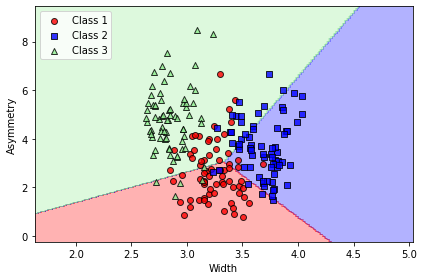

In [11]:
classification_1 = headings[4]
classification_2 = headings[5]
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train.loc[:, [classification_1, classification_2]], y_train)
y_pred = ppn.predict(X_test.loc[:, [classification_1, classification_2]])
print('Misclassified examples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

print('Predicted:', y_pred)
print('True class:', np.array(y_test))


plot_decision_regions(X.loc[:,[classification_1, classification_2]].to_numpy(),
                      y, classifier=ppn)

plt.xlabel(classification_1)
plt.ylabel(classification_2)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

DecisionTreeClassifier

Predicted: [3 2 2 2 2 2 1 1 3 2 1 3 2 3 1 1 3 1 3 1 1 1 1 1 2 2 1 2 3 1 1 1 2 1 2 3 3
 3 1 1 1 3 2 2 3 2 1 2 3 1 3 1 1 1 2 3 3 1 3 1 1 1 1]
True class: [3 2 2 2 2 2 1 3 3 2 1 3 2 3 1 1 3 1 3 1 1 1 1 3 2 2 1 2 3 1 1 2 2 1 2 3 3
 3 2 1 1 3 2 1 3 2 1 2 3 1 3 1 1 3 2 3 3 2 3 2 1 3 2]
Accuracy: 0.8412698412698413


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


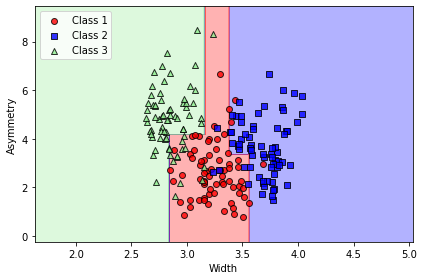

In [12]:
classification_1= headings[4]
classification_2= headings[5]
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, 
                                    random_state=1)
clf.fit(X_train.loc[:,[classification_1, classification_2]],
         y_train)

y_pred = clf.predict(X_test.loc[:, [classification_1, classification_2]])
print('Predicted:', y_pred)
print('True class:', np.array(y_test))

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
plot_decision_regions(X.loc[:,[classification_1, classification_2]].to_numpy(),
                      y, classifier=clf)

plt.xlabel(classification_1)
plt.ylabel(classification_2)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

LogisticRegression

Predicted: [3 2 2 2 2 2 1 3 3 2 1 3 2 3 1 2 3 1 3 1 3 3 1 3 2 2 1 2 3 1 1 1 2 1 2 3 3
 3 3 1 1 3 2 2 3 2 1 2 3 1 3 1 1 3 2 3 3 2 3 1 1 3 1]
True class: [3 2 2 2 2 2 1 3 3 2 1 3 2 3 1 1 3 1 3 1 1 1 1 3 2 2 1 2 3 1 1 2 2 1 2 3 3
 3 2 1 1 3 2 1 3 2 1 2 3 1 3 1 1 3 2 3 3 2 3 2 1 3 2]

Accuracy: 0.873015873015873


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


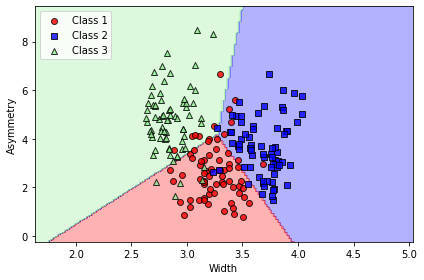

In [13]:
classification_1= headings[4]
classification_2= headings[5]

lr = LogisticRegression()
lr.fit(X_train.loc[:,[classification_1, classification_2]],
       y_train)

y_predict = lr.predict(X_test.loc[:, [classification_1, classification_2]])
print('Predicted:', y_predict)
print('True class:', np.array(y_test))

print('\nAccuracy:', accuracy_score(y_test, y_predict))


plot_decision_regions(X.loc[:,[classification_1, classification_2]].to_numpy(),
                      y, classifier=lr)

plt.xlabel(classification_1)
plt.ylabel(classification_2)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Kernel SVM

Predicted: [3 2 2 2 2 2 1 3 3 2 1 3 2 3 1 2 3 1 3 1 1 3 1 3 2 2 1 2 3 1 1 1 2 1 2 3 3
 3 1 1 1 3 2 2 3 2 1 2 3 1 3 1 1 3 2 3 3 2 3 1 1 3 1]
True class: [3 2 2 2 2 2 1 3 3 2 1 3 2 3 1 1 3 1 3 1 1 1 1 3 2 2 1 2 3 1 1 2 2 1 2 3 3
 3 2 1 1 3 2 1 3 2 1 2 3 1 3 1 1 3 2 3 3 2 3 2 1 3 2]

Accuracy: 0.8888888888888888


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


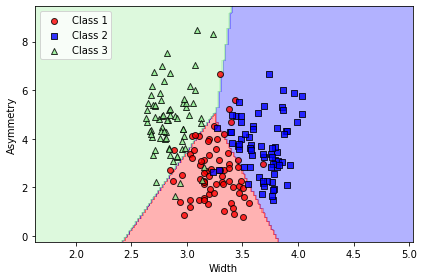

In [22]:
from sklearn.svm import SVC
classification_1= headings[4]
classification_2= headings[5]
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train.loc[:,[classification_1, classification_2]], y_train)
y_predict = svm.predict(X_test.loc[:, [classification_1, classification_2]])
print('Predicted:', y_predict)
print('True class:', np.array(y_test))

print('\nAccuracy:', accuracy_score(y_test, y_predict))
plot_decision_regions(X.loc[:,[classification_1, classification_2]].to_numpy(),
                      y, classifier=svm)
plt.xlabel(classification_1)
plt.ylabel(classification_2)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()